In [2]:
import pandas as pd 
import numpy as np 

import plotly.graph_objects as go 
import plotly.express as px

In [3]:
df = pd.read_csv("Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

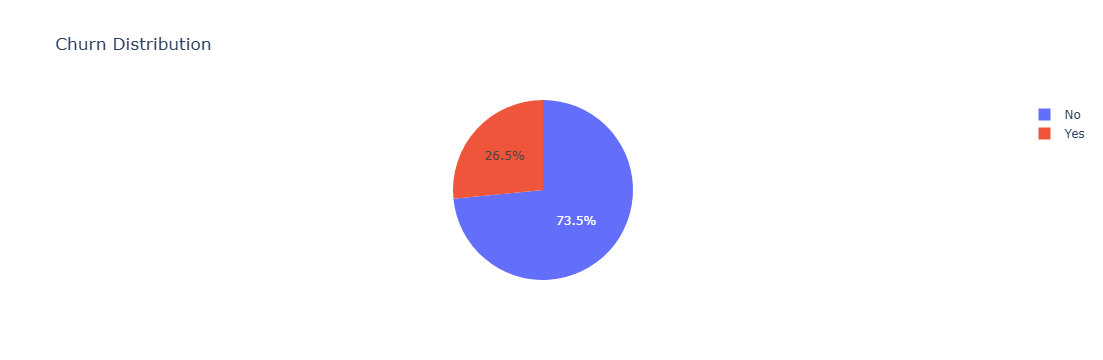

In [9]:
churn_counts = df['Churn'].value_counts()
fig = px.pie(values=churn_counts.values, 
             names=churn_counts.index, 
             title='Churn Distribution')
fig.show()

C:\Users\Mothilal Chowdary\AppData\Local\Temp\ipykernel_7856\2082385661.py:1: Pandas4Warning:

For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.



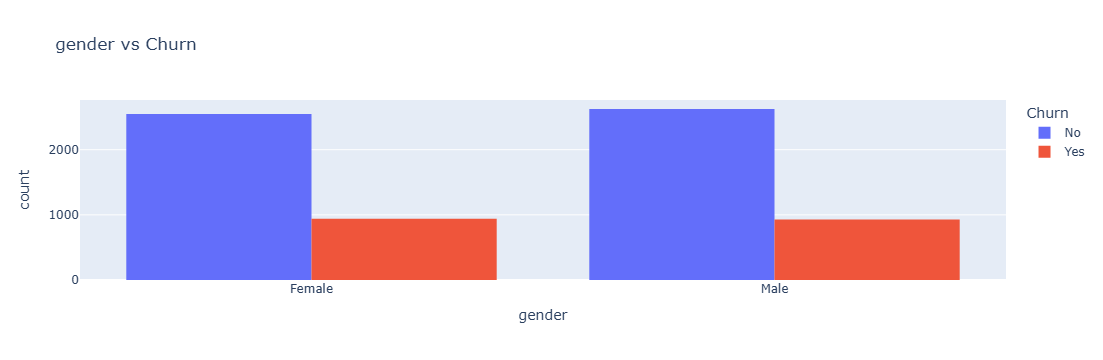

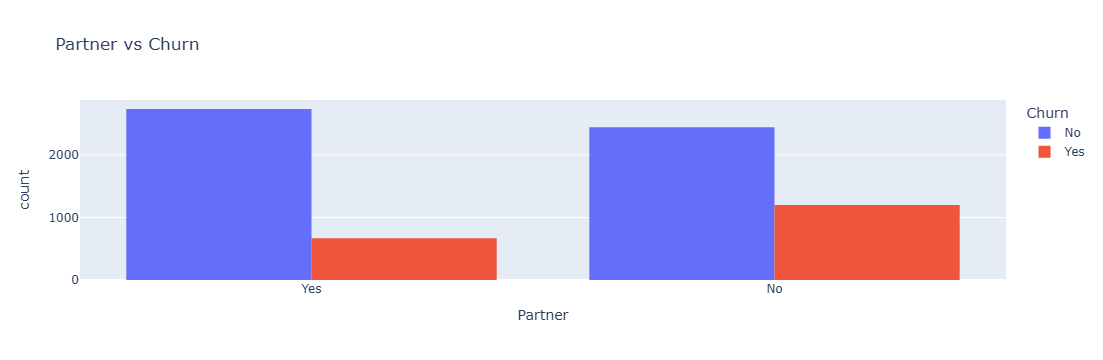

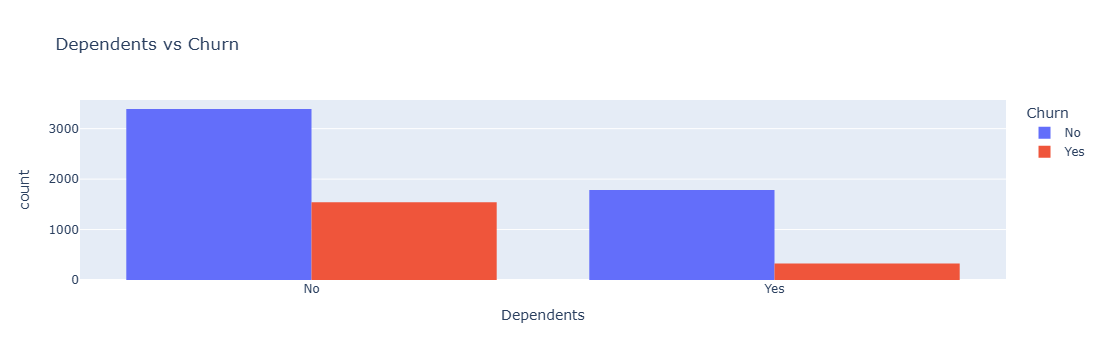

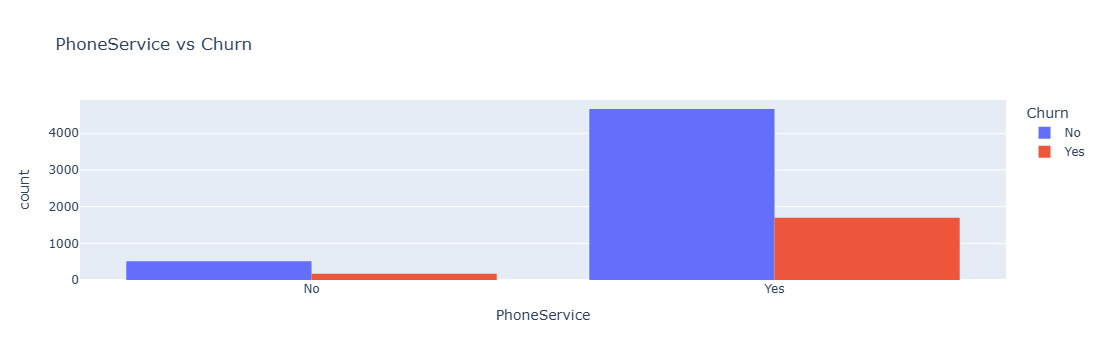

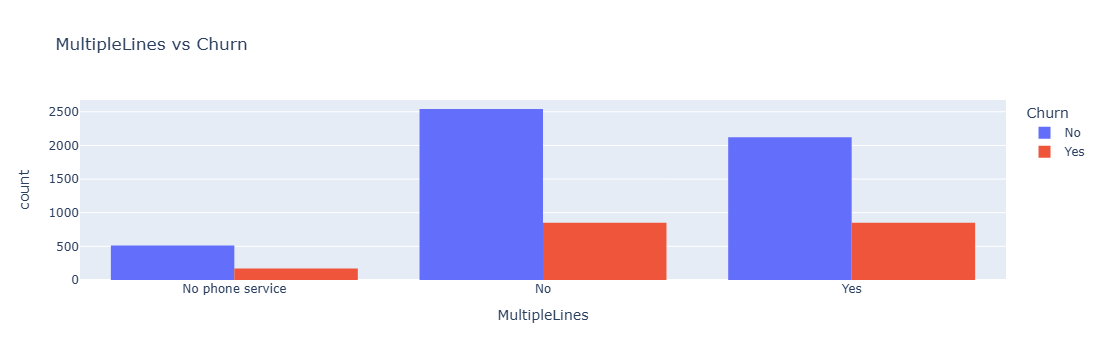

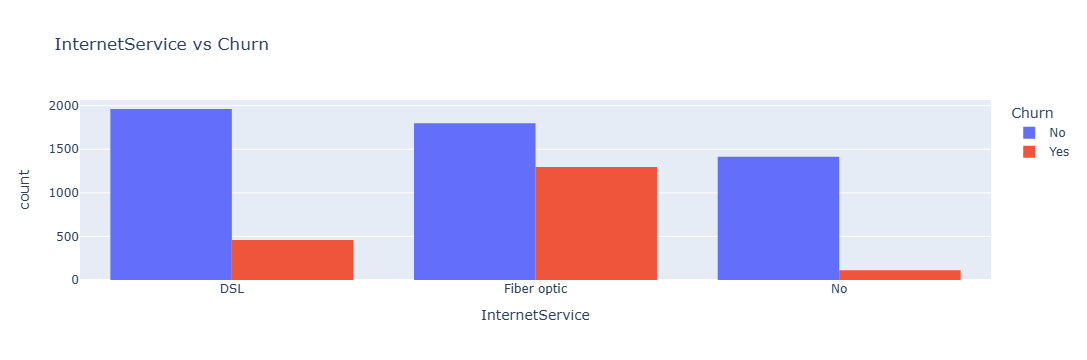

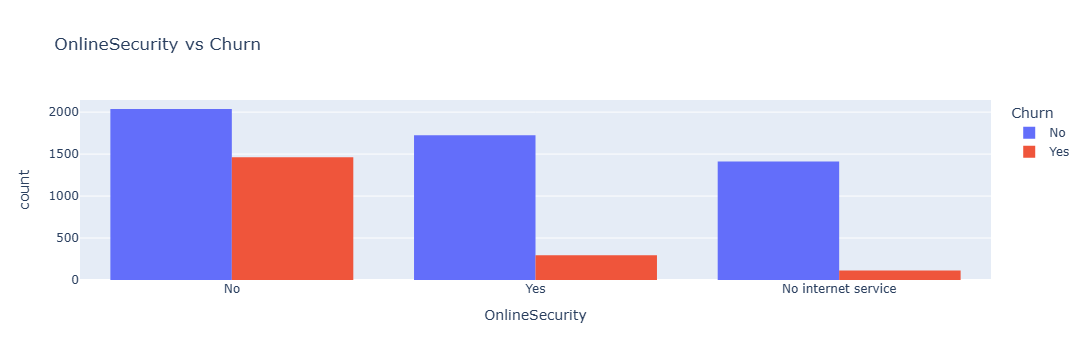

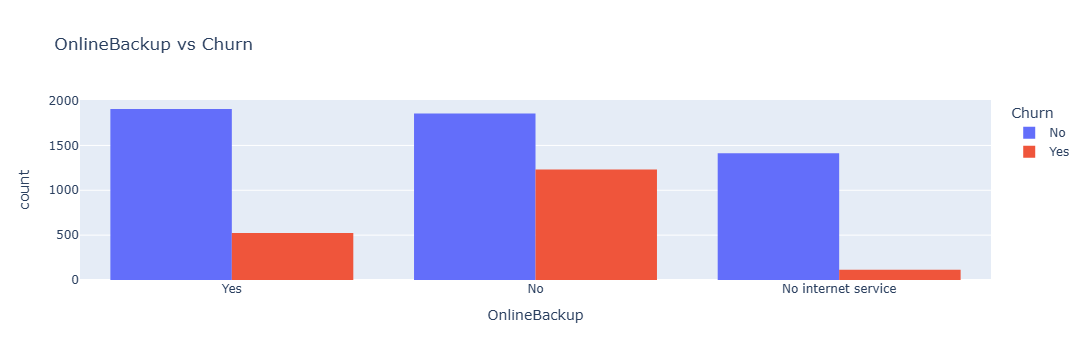

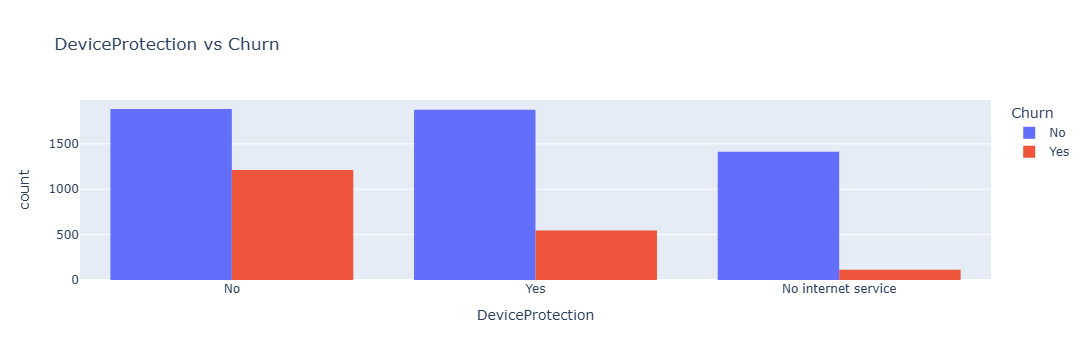

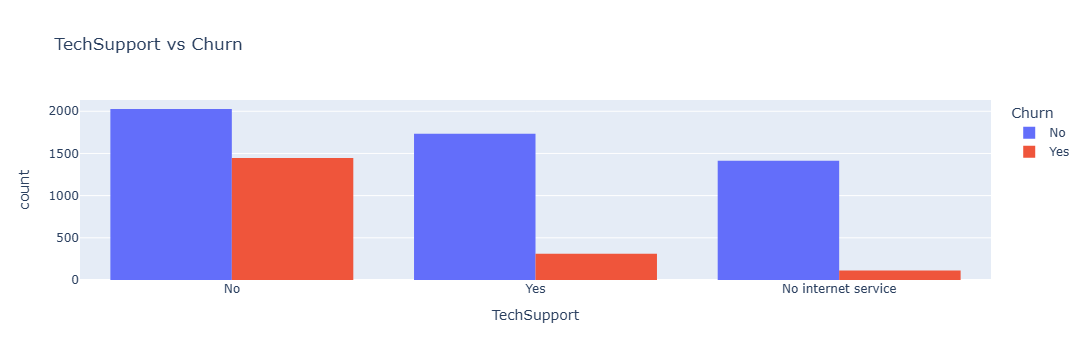

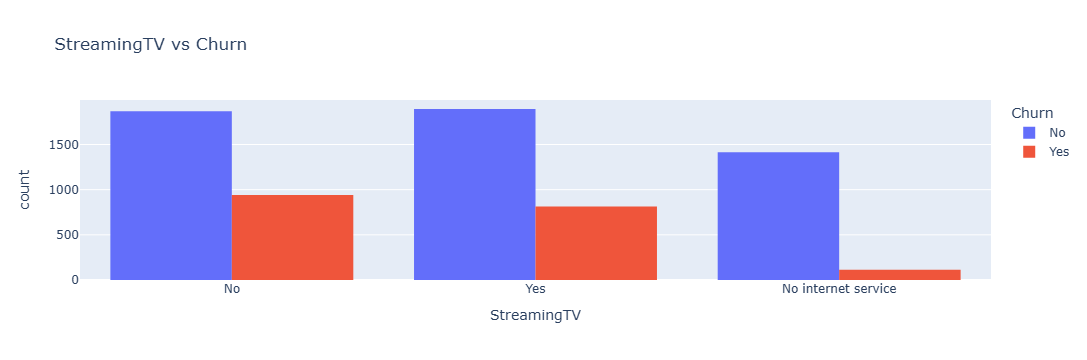

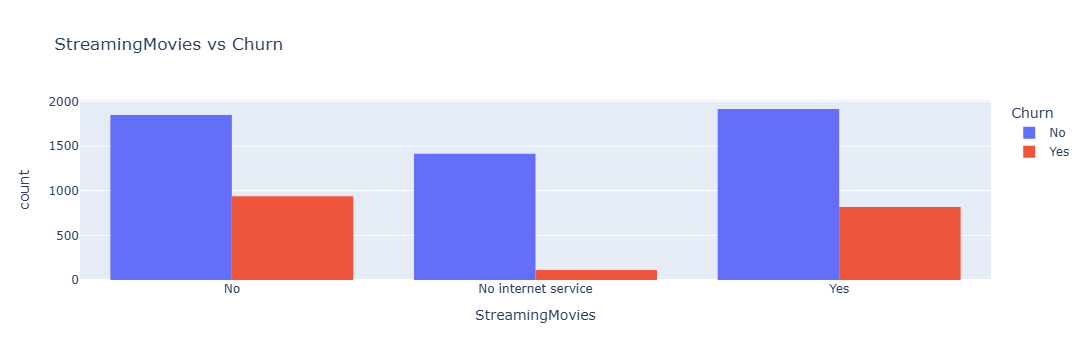

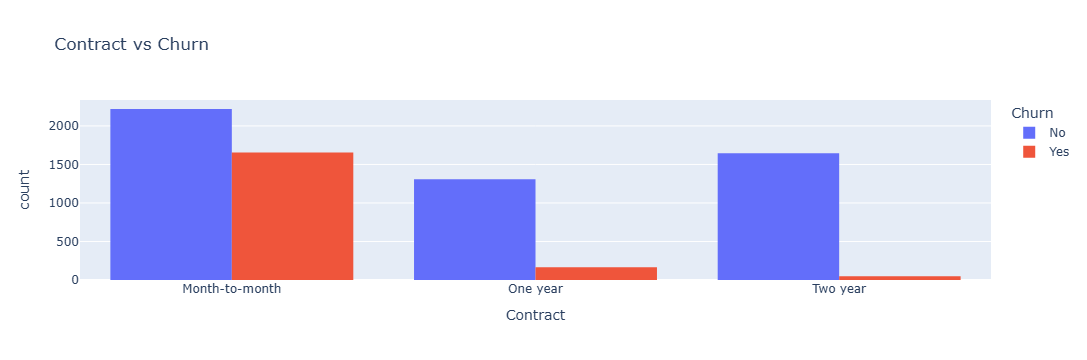

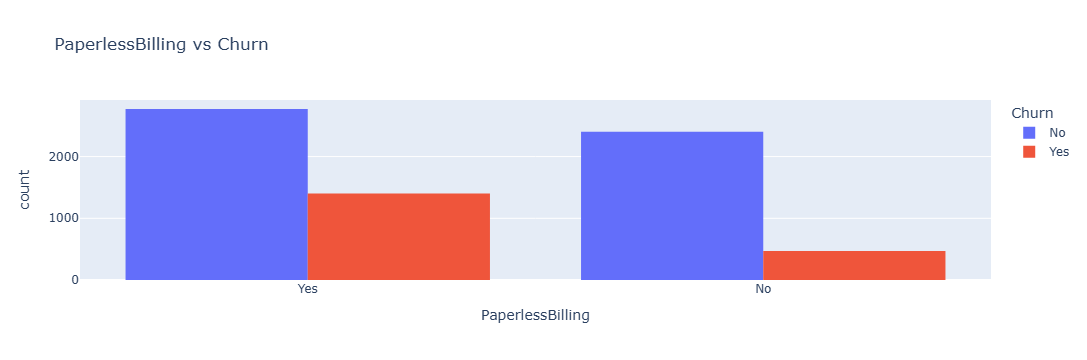

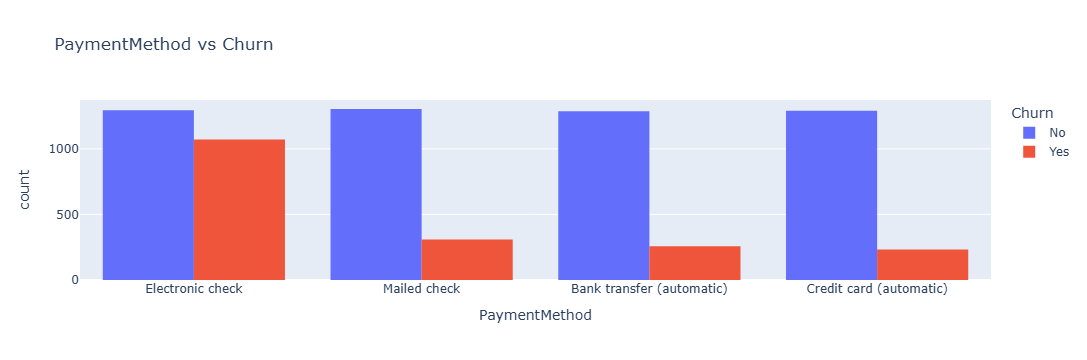

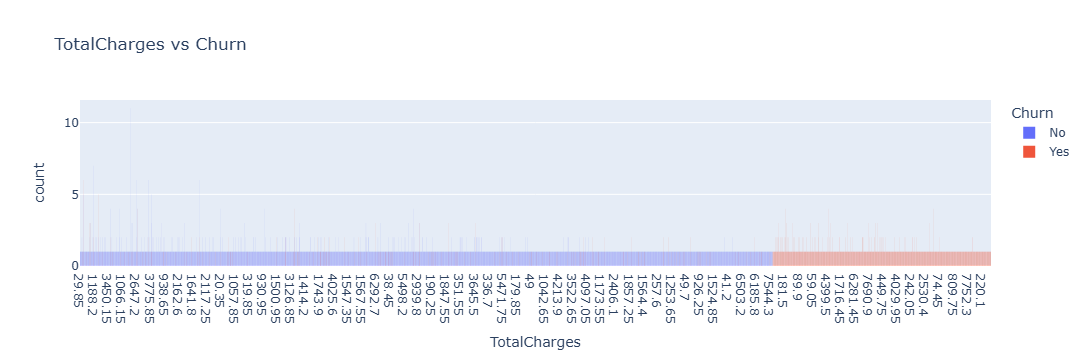

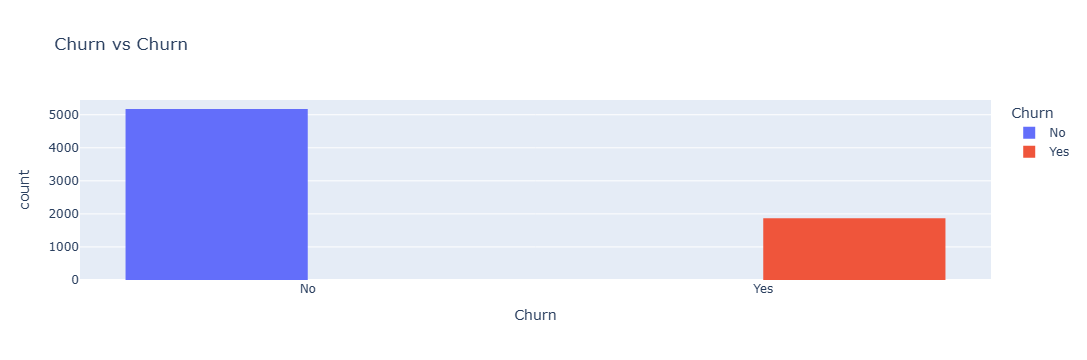

In [10]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')
    
for col in categorical_cols:
    fig = px.histogram(df, x=col, color='Churn', barmode='group',
                       title=f'{col} vs Churn')
    fig.show()

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols.tolist())

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


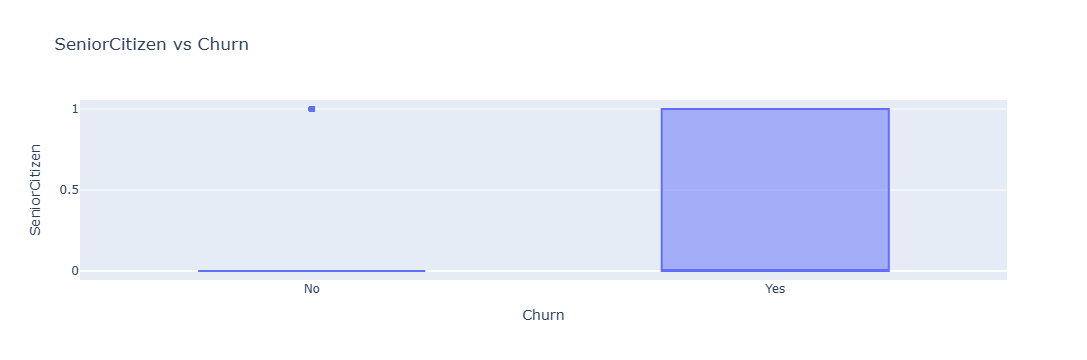

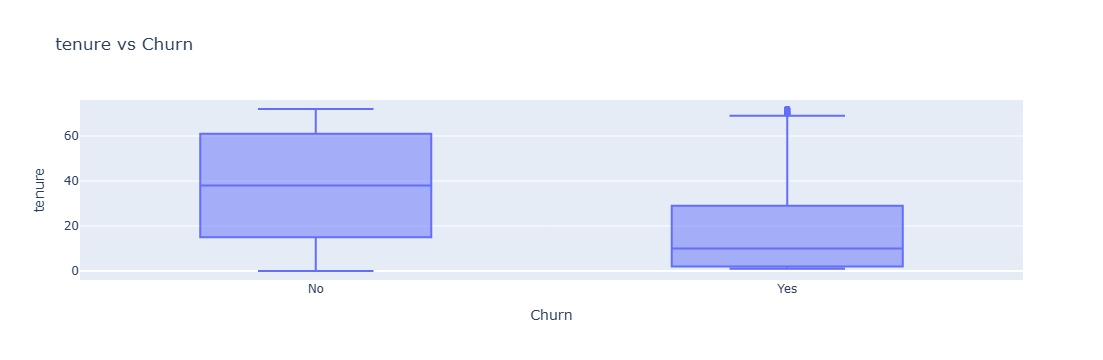

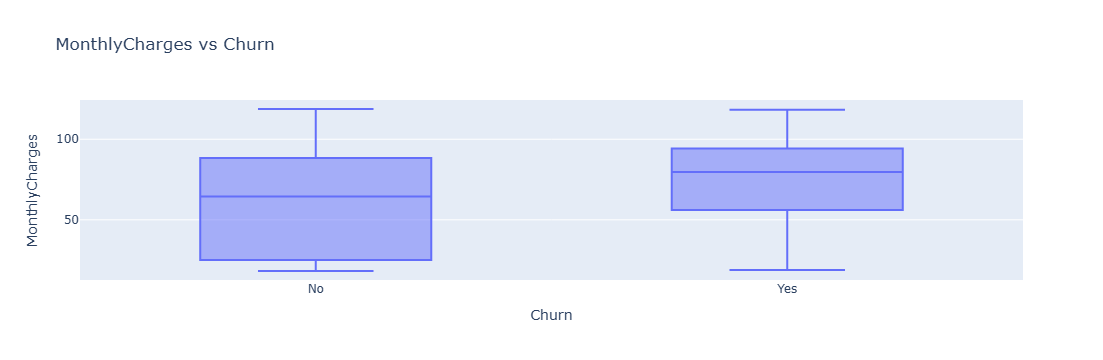

In [12]:
for col in numerical_cols:
    if col != 'Churn':  # skip target
        fig = px.box(df, x='Churn', y=col, title=f'{col} vs Churn')
        fig.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [14]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df = df.dropna(subset=['TotalCharges'])

In [17]:
corr = df[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']].corr()
print(corr)

                MonthlyCharges  TotalCharges    tenure     Churn
MonthlyCharges        1.000000      0.651065  0.246862  0.192858
TotalCharges          0.651065      1.000000  0.825880 -0.199484
tenure                0.246862      0.825880  1.000000 -0.354049
Churn                 0.192858     -0.199484 -0.354049  1.000000


In [18]:
df['avg_charge_per_month'] = df['TotalCharges'] / (df['tenure'] + 1)
df.drop('TotalCharges', axis=1, inplace=True)

In [19]:
df = df.drop('customerID', axis=1)

In [22]:
services = ['PhoneService','MultipleLines','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies']

for col in services:
    df[col] = df[col].replace({
        'Yes': 1,
        'No': 0,
        'No internet service': 0,
        'No phone service': 0
    })


In [23]:
df['InternetService'] = df['InternetService'].replace({
    'DSL': 1,
    'Fiber optic': 1,
    'No': 0
})

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,avg_charge_per_month
0,Female,0,Yes,No,1,0,0,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,0,14.925000
1,Male,0,No,No,34,1,0,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,0,53.985714
2,Male,0,No,No,2,1,0,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,1,36.050000
3,Male,0,No,No,45,0,0,1,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,0,40.016304
4,Female,0,No,No,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,1,50.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,1,1,1,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,0,79.620000
7039,Female,0,Yes,Yes,72,1,1,1,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,0,100.861644
7040,Female,0,Yes,Yes,11,0,0,1,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,0,28.870833
7041,Male,1,Yes,No,4,1,1,1,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,1,61.320000


In [28]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PaperlessBilling']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [29]:
multi_cols = ['Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [33]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,avg_charge_per_month,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,1,29.85,0,14.925000,False,False,False,True,False
1,1,0,0,0,34,1,0,1,1,0,...,0,0,56.95,0,53.985714,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,1,...,0,1,53.85,1,36.050000,False,False,False,False,True
3,1,0,0,0,45,0,0,1,1,0,...,0,0,42.30,0,40.016304,True,False,False,False,False
4,0,0,0,0,2,1,0,1,0,0,...,0,1,70.70,1,50.550000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1,1,84.80,0,79.620000,True,False,False,False,True
7039,0,0,1,1,72,1,1,1,0,1,...,1,1,103.20,0,100.861644,True,False,True,False,False
7040,0,0,1,1,11,0,0,1,1,0,...,0,1,29.60,0,28.870833,False,False,False,True,False
7041,1,1,1,0,4,1,1,1,0,0,...,0,1,74.40,1,61.320000,False,False,False,False,True


In [36]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [38]:
for col in services:
    df[col]=df[col].astype(int)

In [40]:
df['InternetService'] = df['InternetService'].astype(int)

In [46]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
InternetService                            int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
Churn                                      int64
avg_charge_per_month                     float64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit

In [47]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [48]:
df.to_csv("telco_churn_processed.csv", index=False)